In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"

Casename = 'ASTEX_warm2.6'
Casename1 = 'ASTEX_warm5.2'
Casename2 = 'ASTEX_warm2.6_Div3'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f = f.isel(time = slice(0,31))
f1 = f1.isel(time = slice(0,31))
f2 = f2.isel(time = slice(0,31))
nt = f['time'].size
t_hours = np.arange(nt)

z = f['z']/1000.

myfontsize = 12

In [29]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], xrange = [0., 60.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.,
                           ticks = [mylevels.min(), 0, mylevels.max()])
        cbar.set_label(ztitle, fontsize=0.7*myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [15]:
#determine top of surface inversion
indtmp = f.THL2.where(f.z < 0.5*1000.*f.ZINV).argmax(dim = 'z', skipna = 'True')
zinv_bot = f.z[indtmp]/1000.
qtflx_up = f.QTFLUX.sel(z = 1000.*zinv_bot, method="nearest")
qtflx_bot = f.QTFLUX.sel(z = f.z[0], method="nearest")

indtmp = f1.THL2.where(f1.z < 0.5*1000.*f1.ZINV).argmax(dim = 'z', skipna = 'True')
zinv_bot1 = f1.z[indtmp]/1000.
qtflx_up1 = f1.QTFLUX.sel(z = 1000.*zinv_bot1, method="nearest")
qtflx_bot1 = f1.QTFLUX.sel(z = f.z[0], method="nearest")

indtmp = f2.THL2.where(f2.z < 0.5*1000.*f2.ZINV).argmax(dim = 'z', skipna = 'True')
zinv_bot2 = f2.z[indtmp]/1000.
qtflx_up2 = f2.QTFLUX.sel(z = 1000.*zinv_bot2, method="nearest")
qtflx_bot2 = f2.QTFLUX.sel(z = f.z[0], method="nearest")

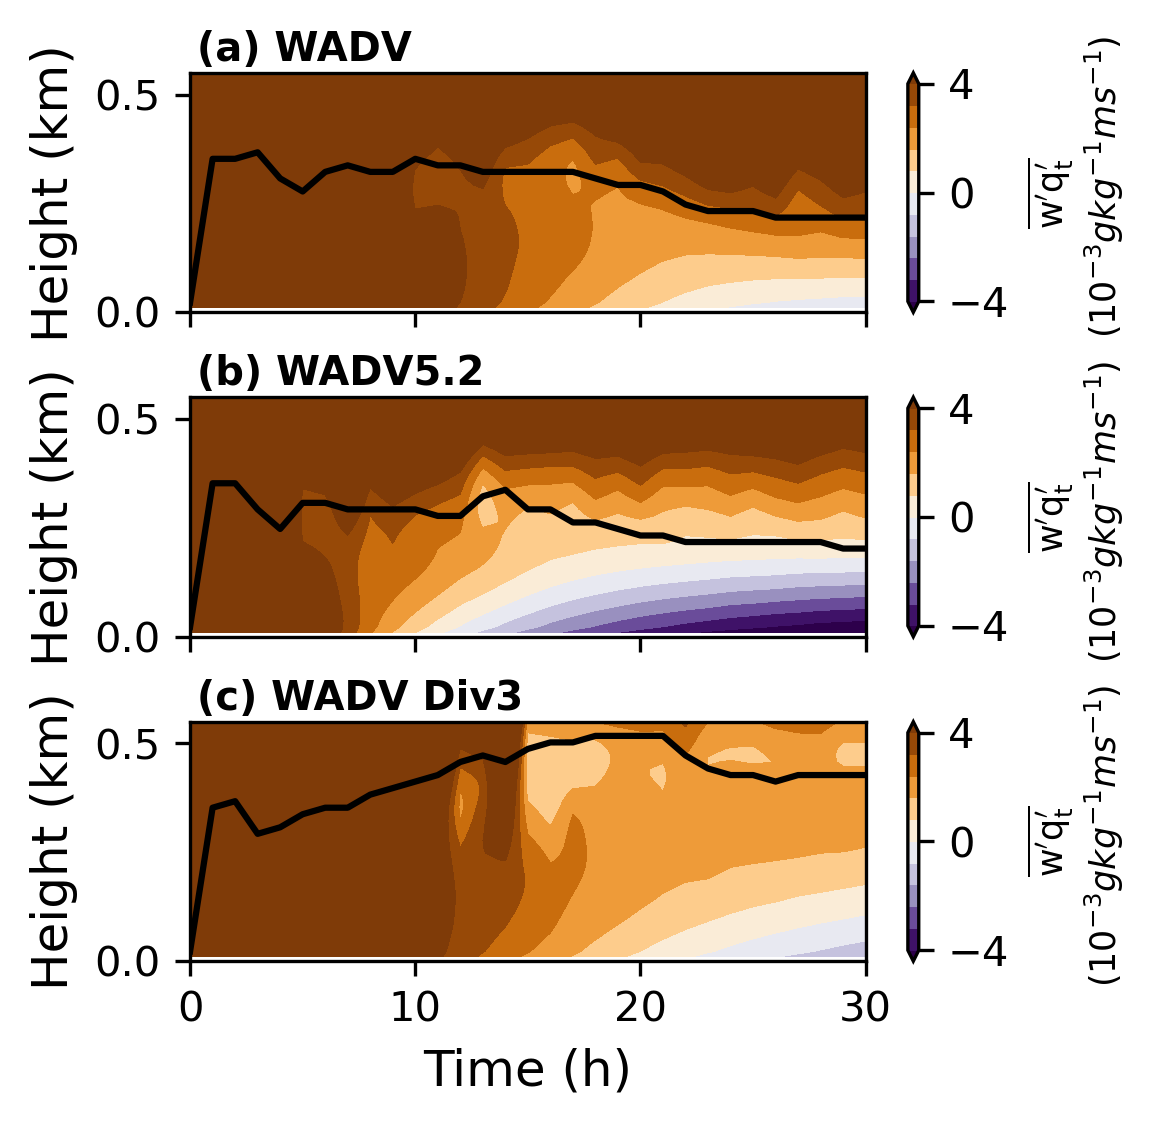

In [32]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 3,
                        sharex = True, sharey = False,
                        figsize=(9/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()
Lv     = 2.5104e6          # Latent heat of condensation, J/kg
# 
mylevels = np.linspace(-4, 4, 10 + 1)
var = 1000.*1000.*f["QTFLUX"]/Lv/f['RHO'] 
oax = plt2D(fig, axs[0], t_hours, z, var.T, 
            "$\mathrm{\overline{w^{\prime}q_t^{\prime}}}$ \n $(10^{-3}gkg^{-1}ms^{-1})$", 
            mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
            yrange = [0, 0.55], xrange = [0, 30], ylabel = True, cbar = True)

var = 1000.*1000.*f1["QTFLUX"]/Lv/f1['RHO'] 
oax = plt2D(fig, axs[1], t_hours, z, var.T, 
            "$\mathrm{\overline{w^{\prime}q_t^{\prime}}}$ \n $(10^{-3}gkg^{-1}ms^{-1})$", 
            mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
            yrange = [0, 0.55], xrange = [0, 30], ylabel = True, cbar = True)

var = 1000.*1000.*f2["QTFLUX"]/Lv/f2['RHO'] 
oax = plt2D(fig, axs[2], t_hours, z, var.T, 
            "$\mathrm{\overline{w^{\prime}q_t^{\prime}}}$ \n $(10^{-3}gkg^{-1}ms^{-1})$",
            mycmap=cm.PuOr_r, mylevels=mylevels, extend='both',
            yrange = [0, 0.55], xrange = [0, 30], ylabel = True, xlabel = True, cbar = True)

axs[0].plot(t_hours, zinv_bot, color = 'black')
axs[1].plot(t_hours, zinv_bot1, color = 'black')
axs[2].plot(t_hours, zinv_bot2, color = 'black')

for i, label in enumerate(('(a) WADV', '(b) WADV5.2', '(c) WADV Div3')):
    axs[i].text(0.01, 1.05, label, transform=axs[i].transAxes,
                fontsize=0.8*myfontsize, fontweight='bold')


fig.savefig('plot_result3_time_height_qt_flux.png', dpi=fig.dpi, bbox_inches='tight')